# K-Fold Cross Validation

Please refer to the following documentation from Scikit-Learn to understand the concepts related with K-Fold Cross Validation.

Reference: https://isheunesu48.medium.com/cross-validation-using-k-fold-with-scikit-learn-cfc44bf1ce6#:~:text=Lets%20take%20the%20scenario%20of,serve%20as%20the%20training%20set.

In this lab we are going to implement a SVC model using k-fold cross validation.

The Iris Dataset that avaiable in Scikit-Learn Datasets will be utilized during this task.

Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris



In [5]:
# Load the necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [6]:
# Load the dataset
data = load_iris()

In [7]:
# Print the model feature names
print("Feature names:", data.feature_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


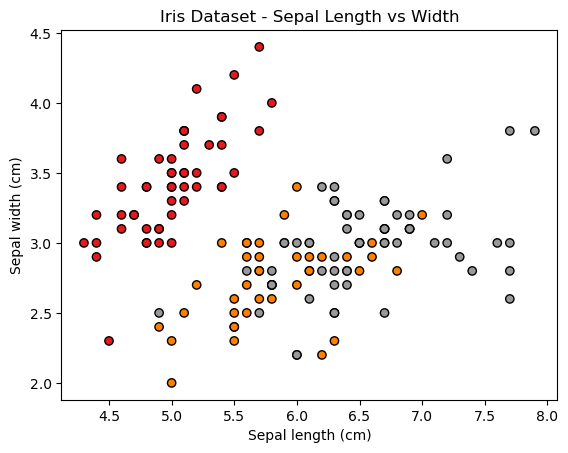

In [8]:
# Select two features from the above features and plot the dataset in the 2D space using matplotlib scatterplot
X = data.data[:, :2]
y = data.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris Dataset - Sepal Length vs Width')
plt.show()

In [9]:
# Seperate the features and target from the dataset.
# Name them as X and y respectively
X = data.data
y = data.target

In [10]:
# Display the shape of the feature set and target
print("Shape of Feature Set (X):", X.shape)
print("Shape of Target (y):", y.shape)

Shape of Feature Set (X): (150, 4)
Shape of Target (y): (150,)


In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Print the train and test set sizes
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 105
Test set size: 45


In [13]:
# Scale the data using scikit-learn standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Define SVC Classifier with default parameters
svc = SVC()

In [15]:
# Estimate the accuracy of the model with k-fold cross validation.
# Use 'cross_val_score' function provided with scikit-learn to obtain the accuracy for each split
# use k = 5
scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)

In [16]:
# Print the calculated scores
print("Cross Validation Scores:", scores)

Cross Validation Scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]


In [17]:
# Calculate the mean and standard deviation of the accuracy scores obtained via k-fold cross validation
# Use numpy functions
mean_score = np.mean(scores)
std_dev_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation of Accuracy:", std_dev_score)

Mean Accuracy: 0.9428571428571428
Standard Deviation of Accuracy: 0.03563483225498991


In [18]:
# Fit the model once again with whole training dataset without cross validation.
# Test the model performance with test set
svc.fit(X_train_scaled, y_train)
test_accuracy = svc.score(X_test_scaled, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 1.0
